In [100]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import datetime
import statsmodels.api as sm

In [101]:
def load_sentiment_scores_from_file(file):
    movie_scores_dict = {}
    
    with open(file, 'r') as input_file:
            
            for line in input_file:
                line_list = line.strip().split()
                movie_scores_dict[' '.join(line_list[:-1])] = float(line_list[-1])
                
    return movie_scores_dict

In [102]:
def make_df(movie_file):
    scores_dict = load_sentiment_scores_from_file('intermediates/movie_log')
    df = pd.DataFrame(list(scores_dict.items()), columns=['movie', 'sentiment score'])
    
    df_movies = pd.read_csv(movie_file, parse_dates=['release_date'])
    df_movies = df_movies[['title', 'revenue', 'budget', 'vote_average', 'vote_count']]
    merged = df.merge(df_movies, left_on='movie', right_on='title', how='inner')
    merged = merged[['movie', 'sentiment score', 'budget', 'vote_average', 'vote_count', 'revenue']]
    return merged

In [103]:
def run_regression(x_list, y_str, df):
    X = df[x_list]
    y = df[y_str]
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
    predictions = model.predict(X)
    return model.summary()

In [105]:
df = make_df('tmdb/tmdb_5000_movies.csv')

In [106]:
run_regression(['sentiment score', 'budget', 'vote_average', 'vote_count'], 'revenue', df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     225.4
Date:                Thu, 02 May 2019   Prob (F-statistic):          4.40e-110
Time:                        23:12:21   Log-Likelihood:                -10236.
No. Observations:                 501   AIC:                         2.048e+04
Df Residuals:                     496   BIC:                         2.050e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -9.587e+07   8.15e+07     -1.176      0.240   -2.56e+08    6.43e+07
sentiment score -1.795e+07   7.52e+07     -0.239      0.811   -1.66e+08     1.3e+08
budget              1.9870      0.171     11.618      0.000       1.651       2.323
vote_average     7.224e+06   1.33e+07      0.543      0.587   -1.89e+07    3.34e+07
vote_count       7.197e+04   5324.830     13.516      0.000    6.15e+04    8.24e+04
==============================================================================
Omnibus:                      272.812   Durbin-Watson:                   1.779
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3435.745
Skew:                           2.082   Prob(JB):                         0.00
Kurtosis:                      15.135   Cond. No.                     1.24e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
def make_log_df():
    scores_dict = load_sentiment_scores_from_file('intermediates/movie_log')
    df = pd.DataFrame(list(scores_dict.items()), columns=['movie', 'sentiment score'])
    
    return df

In [108]:
df = make_log_df()

In [109]:
df

,movie,sentiment score
0,Avatar,0.360022
1,Pirates of the Caribbean: At World's End,0.319618
2,Spectre,0.398586
3,The Dark Knight Rises,0.353858
4,John Carter,0.376332
5,Spider-Man 3,0.297028
6,Tangled,0.539824
7,Avengers: Age of Ultron,0.327815
8,Harry Potter and the Half-Blood Prince,0.369921
9,Batman v Superman: Dawn of Justice,0.345240


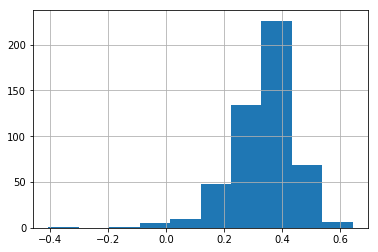

In [111]:
plt = df['sentiment score'].hist()

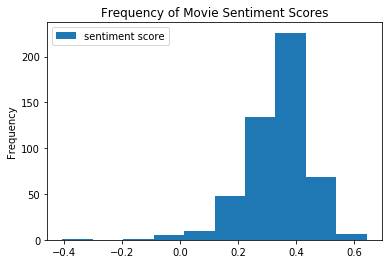

In [135]:
ax = df.plot(kind='hist', title='Frequency of Movie Sentiment Scores')

In [128]:
ax.set_xlabel("Film Sentiment")

Text(0.5, 3.1999999999999993, 'Film Sentiment')

In [134]:
ax